In [42]:
# Insert path to dataset file into string below
path_to_file = 'ММШІ КН ФКНК КНУТШ/Навчальні та робочі матеріали/Актуальні проблеми "Data Mining"/Euro_exchange_rate_in_national_currencies.csv'

In [3]:
from google.colab import drive
import sys
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Python version:       ' + sys.version)
print('MatPlotLib version:   ' + mpl.__version__)
print('SeaBorn version:      ' + sns.__version__)
print('NumPy version:        ' + np.__version__)
print('Pandas version:       ' + pd.__version__)
print('SciKit-Learn version: ' + sklearn.__version__)

Python version:       3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
MatPlotLib version:   3.10.0
SeaBorn version:      0.13.2
NumPy version:        1.26.4
Pandas version:       2.2.2
SciKit-Learn version: 1.6.1


**Daily exchange rates per euro in national currencies (04 January 1999 - 27 September 2024):** https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020/data

In [41]:
drive.mount('/content/google-drive', force_remount=True);
dataset = pd.read_csv('/content/google-drive/MyDrive/' + path_to_file)
dataset

Mounted at /content/google-drive


,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2024-09-27,1.618,1.9558,6.0668,1.5036,0.942,7.823,NaN,25.158,7.457,...,4.9764,NaN,11.273,1.4305,NaN,NaN,36.135,38.1336,1.1158,19.1092
1,2024-09-26,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,NaN,25.159,7.4572,...,4.9759,NaN,11.3,1.4328,NaN,NaN,36.215,38.1022,1.1155,19.238
2,2024-09-25,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,NaN,25.123,7.4575,...,4.9760,NaN,11.311,1.4378,NaN,NaN,36.599,38.2090,1.1194,19.1932
3,2024-09-24,1.6237,1.9558,6.137,1.5033,0.9439,7.829,NaN,25.155,7.4571,...,4.9756,NaN,11.2935,1.4341,NaN,NaN,36.569,38.0064,1.1133,19.2869
4,2024-09-23,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,NaN,25.098,7.4581,...,4.9742,NaN,11.362,1.4357,NaN,NaN,36.654,37.9745,1.1119,19.3253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6651,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6652,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6653,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [5]:
dataset.rename(columns={"Period\\Unit:": "Date"}, inplace=True)
dataset.columns = [column.strip("[ ]") for column in dataset.columns]
dataset

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
0,2024-09-27,1.618,1.9558,6.0668,1.5036,0.942,7.823,NaN,25.158,7.457,...,4.9764,NaN,11.273,1.4305,NaN,NaN,36.135,38.1336,1.1158,19.1092
1,2024-09-26,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,NaN,25.159,7.4572,...,4.9759,NaN,11.3,1.4328,NaN,NaN,36.215,38.1022,1.1155,19.238
2,2024-09-25,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,NaN,25.123,7.4575,...,4.9760,NaN,11.311,1.4378,NaN,NaN,36.599,38.2090,1.1194,19.1932
3,2024-09-24,1.6237,1.9558,6.137,1.5033,0.9439,7.829,NaN,25.155,7.4571,...,4.9756,NaN,11.2935,1.4341,NaN,NaN,36.569,38.0064,1.1133,19.2869
4,2024-09-23,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,NaN,25.098,7.4581,...,4.9742,NaN,11.362,1.4357,NaN,NaN,36.654,37.9745,1.1119,19.3253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6651,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6652,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6653,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [6]:
print("Column:                  -\n")
for column, has_dash in (dataset == "-").any().items():
    print(f"{column.ljust(24)} {has_dash}")

Column:                  -

Date                     False
Australian dollar        True
Bulgarian lev            True
Brazilian real           True
Canadian dollar          True
Swiss franc              True
Chinese yuan renminbi    True
Cypriot pound            True
Czech koruna             True
Danish krone             True
Estonian kroon           True
UK pound sterling        True
Greek drachma            True
Hong Kong dollar         True
Croatian kuna            True
Hungarian forint         True
Indonesian rupiah        True
Israeli shekel           True
Indian rupee             True
Iceland krona            False
Japanese yen             True
Korean won               True
Lithuanian litas         True
Latvian lats             True
Maltese lira             True
Mexican peso             True
Malaysian ringgit        True
Norwegian krone          True
New Zealand dollar       True
Philippine peso          True
Polish zloty             True
Romanian leu             False
Russian r

In [7]:
dataset.replace("-", np.nan, inplace=True)

In [8]:
print("Column:                  -        NaN\n")
for column in dataset.columns:
    has_dash = (dataset[column] == "-").any()
    has_nan = dataset[column].isna().any()
    print(f"{column.ljust(24)} {str(has_dash).ljust(8)} {has_nan}")

Column:                  -        NaN

Date                     False    False
Australian dollar        False    True
Bulgarian lev            False    True
Brazilian real           False    True
Canadian dollar          False    True
Swiss franc              False    True
Chinese yuan renminbi    False    True
Cypriot pound            False    True
Czech koruna             False    True
Danish krone             False    True
Estonian kroon           False    True
UK pound sterling        False    True
Greek drachma            False    True
Hong Kong dollar         False    True
Croatian kuna            False    True
Hungarian forint         False    True
Indonesian rupiah        False    True
Israeli shekel           False    True
Indian rupee             False    True
Iceland krona            False    True
Japanese yen             False    True
Korean won               False    True
Lithuanian litas         False    True
Latvian lats             False    True
Maltese lira            

In [9]:
dataset_only_exchange_rates = dataset.drop(columns=["Date"])
dataset_with_nans = dataset[dataset_only_exchange_rates.apply(lambda row: all(pd.isna(cell) for cell in row), axis=1)]
dataset_with_nans

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
3178,2012-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3194,2012-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3195,2012-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3269,2011-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3444,2011-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,2000-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6309,2000-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6314,2000-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6315,2000-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
dataset = dataset.drop(index=dataset_with_nans.index)
dataset

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
0,2024-09-27,1.618,1.9558,6.0668,1.5036,0.942,7.823,NaN,25.158,7.457,...,4.9764,NaN,11.273,1.4305,NaN,NaN,36.135,38.1336,1.1158,19.1092
1,2024-09-26,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,NaN,25.159,7.4572,...,4.9759,NaN,11.3,1.4328,NaN,NaN,36.215,38.1022,1.1155,19.238
2,2024-09-25,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,NaN,25.123,7.4575,...,4.9760,NaN,11.311,1.4378,NaN,NaN,36.599,38.2090,1.1194,19.1932
3,2024-09-24,1.6237,1.9558,6.137,1.5033,0.9439,7.829,NaN,25.155,7.4571,...,4.9756,NaN,11.2935,1.4341,NaN,NaN,36.569,38.0064,1.1133,19.2869
4,2024-09-23,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,NaN,25.098,7.4581,...,4.9742,NaN,11.362,1.4357,NaN,NaN,36.654,37.9745,1.1119,19.3253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6651,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6652,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6653,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [11]:
print("Rows with NaNs:", dataset.isna().any(axis=1).sum())

Rows with NaNs: 6477


In [12]:
dataset = dataset.ffill().bfill()
dataset

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
0,2024-09-27,1.618,1.9558,6.0668,1.5036,0.942,7.823,0.58527,25.158,7.457,...,4.9764,117.2010,11.273,1.4305,239.6400,30.126,36.135,38.1336,1.1158,19.1092
1,2024-09-26,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,0.58527,25.159,7.4572,...,4.9759,117.2010,11.3,1.4328,239.6400,30.126,36.215,38.1022,1.1155,19.238
2,2024-09-25,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,0.58527,25.123,7.4575,...,4.9760,117.2010,11.311,1.4378,239.6400,30.126,36.599,38.2090,1.1194,19.1932
3,2024-09-24,1.6237,1.9558,6.137,1.5033,0.9439,7.829,0.58527,25.155,7.4571,...,4.9756,117.2010,11.2935,1.4341,239.6400,30.126,36.569,38.0064,1.1133,19.2869
4,2024-09-23,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,0.58527,25.098,7.4581,...,4.9742,117.2010,11.362,1.4357,239.6400,30.126,36.654,37.9745,1.1119,19.3253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,1999-01-08,1.8406,1.9469,1.8718,1.7643,1.6138,8.5054,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
6651,1999-01-07,1.8474,1.9469,1.8718,1.7602,1.6165,8.5054,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6652,1999-01-06,1.8820,1.9469,1.8718,1.7711,1.6116,8.5054,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6653,1999-01-05,1.8944,1.9469,1.8718,1.7965,1.6123,8.5054,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975


In [13]:
dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
for column in dataset.columns:
    if column == 'Date':
        dataset[column] = dataset[column].apply(lambda date: date.toordinal())
    elif column != 'Date':
        dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

print(f"{'Column:':<24} {'Data type:':<13} {'Contains NaN/NaT:':<17}\n")
for column in dataset.columns:
    check_nan_nat = "Yes" if dataset[column].isnull().any() else "No"
    print(f"{column:<24} {str(dataset[column].dtype):<13} {check_nan_nat:<17}")

Column:                  Data type:    Contains NaN/NaT:

Date                     int64         No               
Australian dollar        float64       No               
Bulgarian lev            float64       No               
Brazilian real           float64       No               
Canadian dollar          float64       No               
Swiss franc              float64       No               
Chinese yuan renminbi    float64       No               
Cypriot pound            float64       No               
Czech koruna             float64       No               
Danish krone             float64       No               
Estonian kroon           float64       No               
UK pound sterling        float64       No               
Greek drachma            float64       No               
Hong Kong dollar         float64       No               
Croatian kuna            float64       No               
Hungarian forint         float64       No               
Indonesian rupiah        float

In [14]:
print("Column \"Estonian kroon\" unique values (before changes):", dataset["Estonian kroon"].unique())
dataset["Estonian kroon"] = dataset["Estonian kroon"] + np.random.normal(0, 1e-5, size=len(dataset))
print("Column \"Estonian kroon\" unique values (after changes):", dataset["Estonian kroon"].unique())

Column "Estonian kroon" unique values (before changes): [15.6466]
Column "Estonian kroon" unique values (after changes): [15.64660705 15.64660984 15.64660705 ... 15.6465831  15.64661601
 15.64659914]


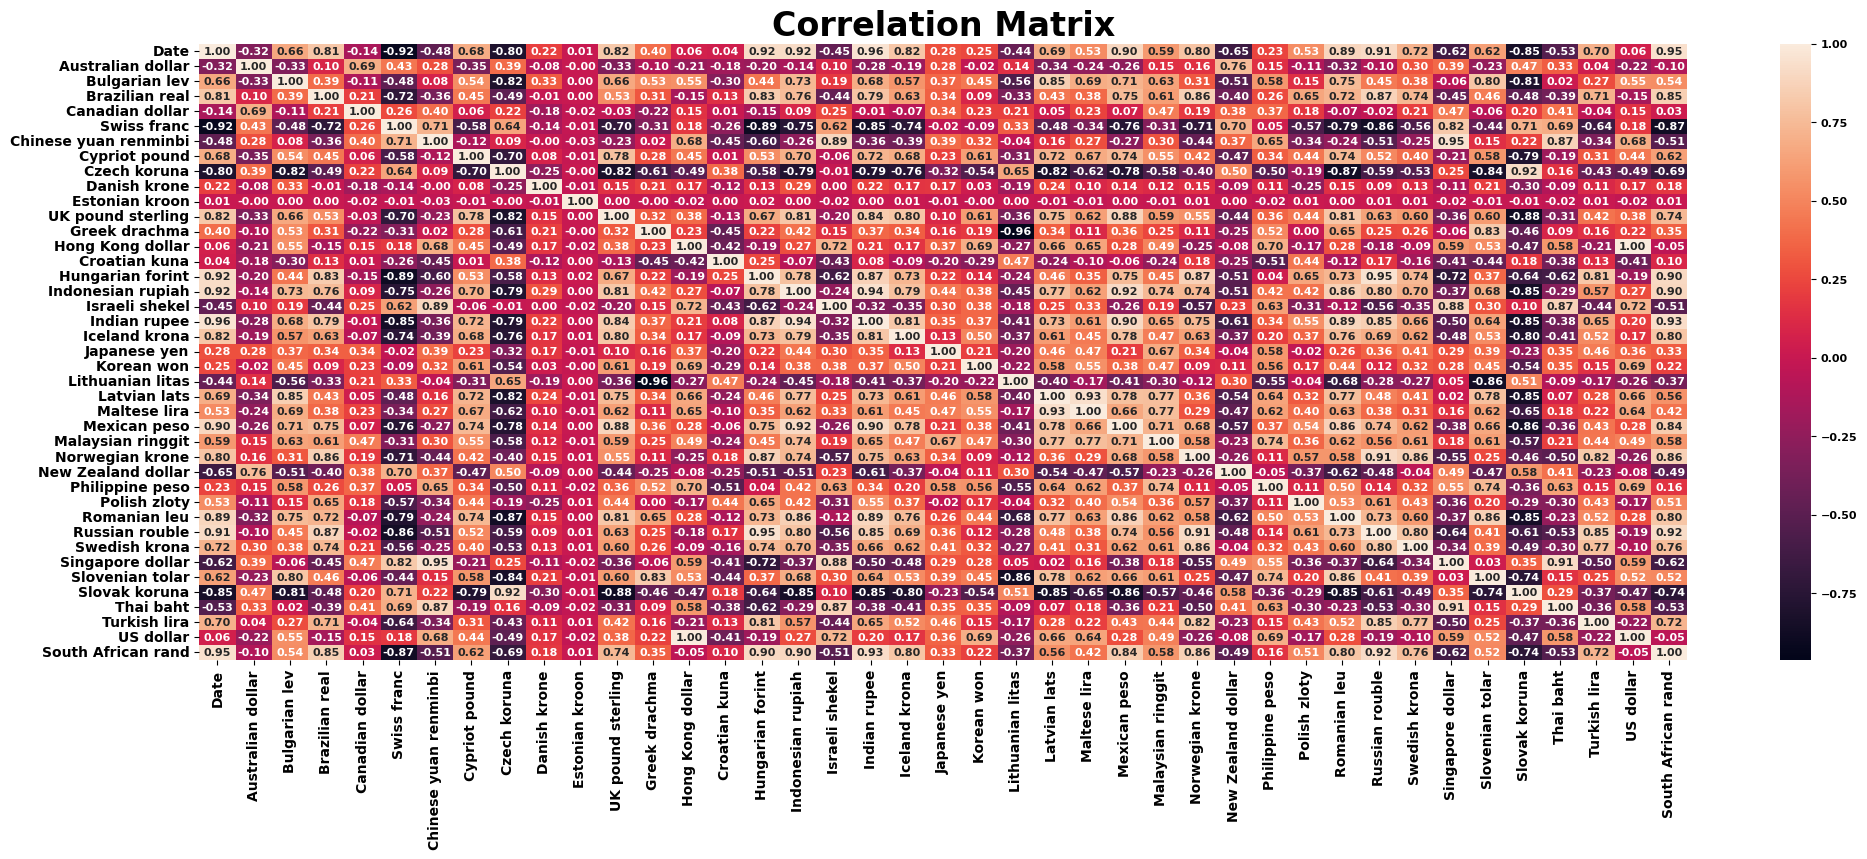

In [15]:
plt.figure(figsize=(24, 8))
plt.title("Correlation Matrix", fontweight='bold', fontsize=24)
correlation_matrix = sns.heatmap(
    dataset.corr(),
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8, "fontweight": "bold"},
    cmap="rocket"
)
correlation_matrix.set_xticklabels(correlation_matrix.get_xticklabels(), fontweight='bold')
correlation_matrix.set_yticklabels(correlation_matrix.get_yticklabels(), fontweight='bold')
color_bar = correlation_matrix.collections[0].colorbar
for obj in color_bar.ax.yaxis.get_ticklabels():
    obj.set_fontweight('bold')
    obj.set_fontsize(8)
plt.show()

**Correlation between features ≥ 0.93 or ≤ - 0.93 :**
* Latvian lats - Maltese lira - 0.93; ⨉
* Indian rupee - Indonesian rupiah - 0.94; ✓
* Hungarian forint - Russian rouble - 0.95; ⨉
* US dollar - Hong Kong dollar - 1.00; ✓
* Greek drachma - Lithuanian litas - - 0.96; ⨉
* Chinese yuan renminbi - Singapore dollar - 0.95; ✓
* Date - Indian rupee - 0.96; ⨉
* Date - South African rand - 0.95; ⨉

**Constant values:**
* Estonian kroon; ✓

In [16]:
columns_to_remove = [
    'Maltese lira',
    'Estonian kroon',
    'Indonesian rupiah',
    'Russian rouble',
    'Hong Kong dollar',
    'Lithuanian litas',
    'Singapore dollar',
    'Indian rupee',
    'South African rand'
]
dataset.drop(columns=columns_to_remove, inplace=True)
dataset

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,New Zealand dollar,Philippine peso,Polish zloty,Romanian leu,Swedish krona,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar
0,739156,1.6180,1.9558,6.0668,1.5036,0.9420,7.8230,0.58527,25.158,7.4570,...,1.7649,62.591,4.2738,4.9764,11.2730,239.640,30.126,36.1350,38.1336,1.1158
1,739155,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,0.58527,25.159,7.4572,...,1.7691,62.423,4.2710,4.9759,11.3000,239.640,30.126,36.2150,38.1022,1.1155
2,739154,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,0.58527,25.123,7.4575,...,1.7725,62.609,4.2643,4.9760,11.3110,239.640,30.126,36.5990,38.2090,1.1194
3,739153,1.6237,1.9558,6.1370,1.5033,0.9439,7.8290,0.58527,25.155,7.4571,...,1.7707,62.601,4.2665,4.9756,11.2935,239.640,30.126,36.5690,38.0064,1.1133
4,739152,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,0.58527,25.098,7.4581,...,1.7770,62.300,4.2750,4.9742,11.3620,239.640,30.126,36.6540,37.9745,1.1119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,729762,1.8406,1.9469,1.8718,1.7643,1.6138,8.5054,0.58187,34.938,7.4433,...,2.1557,44.295,4.0363,1.3143,9.1650,188.840,42.560,42.5590,0.3718,1.1659
6651,729761,1.8474,1.9469,1.8718,1.7602,1.6165,8.5054,0.58187,34.886,7.4431,...,2.1531,44.436,4.0165,1.3092,9.1800,188.800,42.765,42.1678,0.3701,1.1632
6652,729760,1.8820,1.9469,1.8718,1.7711,1.6116,8.5054,0.58200,34.850,7.4452,...,2.1890,44.872,4.0065,1.3168,9.3050,188.700,42.778,42.6949,0.3722,1.1743
6653,729759,1.8944,1.9469,1.8718,1.7965,1.6123,8.5054,0.58230,34.917,7.4495,...,2.2011,44.745,4.0245,1.3168,9.4025,188.775,42.848,42.5048,0.3728,1.1790


In [17]:
dataset["Mean exchange rate"] = dataset.drop(columns=["Date"]).mean(axis=1)
mean_exchange_rate_all_time = dataset["Mean exchange rate"].describe()["mean"]
dataset["Global inflation"] = dataset["Mean exchange rate"].apply(lambda cell: 1 if cell > mean_exchange_rate_all_time else -1)
dataset = dataset.drop(columns=["Mean exchange rate"])
dataset

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Philippine peso,Polish zloty,Romanian leu,Swedish krona,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,Global inflation
0,739156,1.6180,1.9558,6.0668,1.5036,0.9420,7.8230,0.58527,25.158,7.4570,...,62.591,4.2738,4.9764,11.2730,239.640,30.126,36.1350,38.1336,1.1158,1
1,739155,1.6217,1.9558,6.0372,1.5025,0.9452,7.8213,0.58527,25.159,7.4572,...,62.423,4.2710,4.9759,11.3000,239.640,30.126,36.2150,38.1022,1.1155,1
2,739154,1.6276,1.9558,6.1104,1.5044,0.9495,7.8692,0.58527,25.123,7.4575,...,62.609,4.2643,4.9760,11.3110,239.640,30.126,36.5990,38.2090,1.1194,1
3,739153,1.6237,1.9558,6.1370,1.5033,0.9439,7.8290,0.58527,25.155,7.4571,...,62.601,4.2665,4.9756,11.2935,239.640,30.126,36.5690,38.0064,1.1133,1
4,739152,1.6274,1.9558,6.1976,1.5065,0.9448,7.8438,0.58527,25.098,7.4581,...,62.300,4.2750,4.9742,11.3620,239.640,30.126,36.6540,37.9745,1.1119,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,729762,1.8406,1.9469,1.8718,1.7643,1.6138,8.5054,0.58187,34.938,7.4433,...,44.295,4.0363,1.3143,9.1650,188.840,42.560,42.5590,0.3718,1.1659,-1
6651,729761,1.8474,1.9469,1.8718,1.7602,1.6165,8.5054,0.58187,34.886,7.4431,...,44.436,4.0165,1.3092,9.1800,188.800,42.765,42.1678,0.3701,1.1632,-1
6652,729760,1.8820,1.9469,1.8718,1.7711,1.6116,8.5054,0.58200,34.850,7.4452,...,44.872,4.0065,1.3168,9.3050,188.700,42.778,42.6949,0.3722,1.1743,-1
6653,729759,1.8944,1.9469,1.8718,1.7965,1.6123,8.5054,0.58230,34.917,7.4495,...,44.745,4.0245,1.3168,9.4025,188.775,42.848,42.5048,0.3728,1.1790,-1


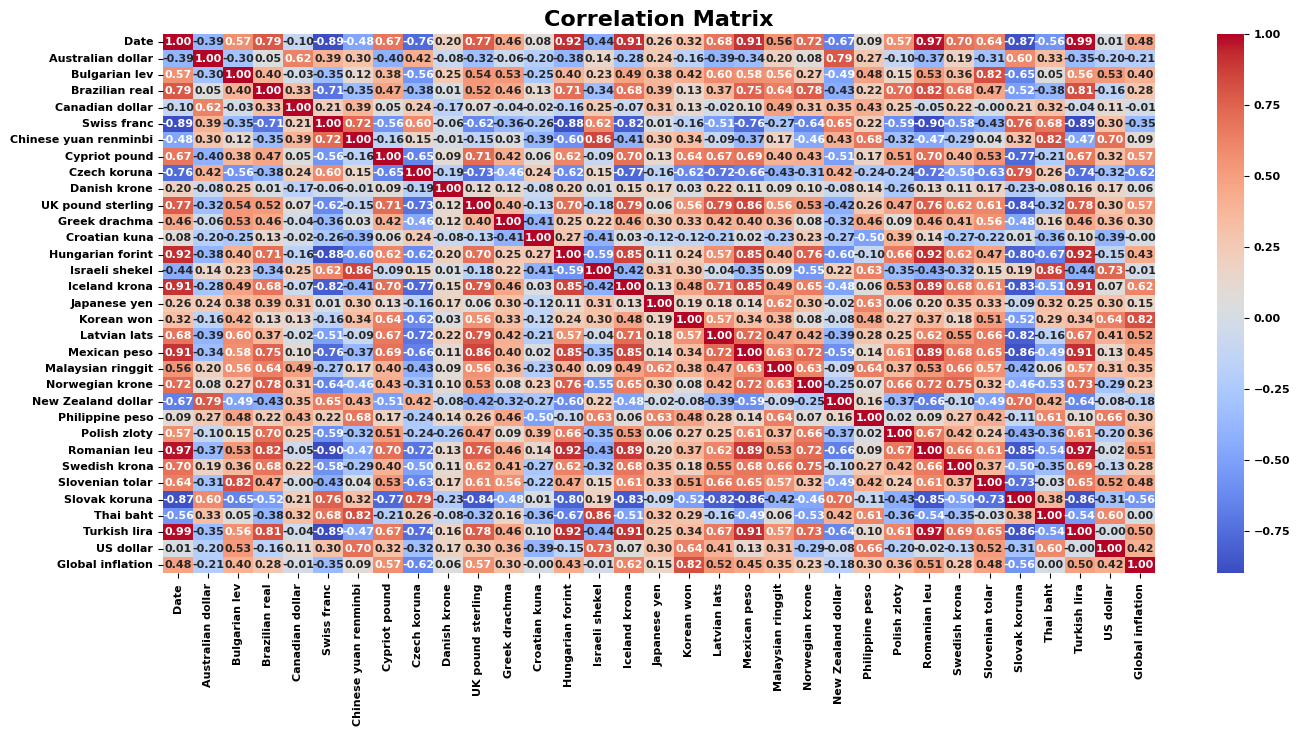

In [18]:
plt.figure(figsize=(16, 7))
plt.title("Correlation Matrix", fontweight='bold', fontsize=16)
correlation_matrix = sns.heatmap(
    dataset.corr(method='spearman'),
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8, "fontweight": "bold"},
    cmap="coolwarm"
)
correlation_matrix.set_xticklabels(
    correlation_matrix.get_xticklabels(),
    fontweight='bold',
    fontsize=8
)
correlation_matrix.set_yticklabels(
    correlation_matrix.get_yticklabels(),
    fontweight='bold',
    fontsize=8
)
color_bar = correlation_matrix.collections[0].colorbar
for obj in color_bar.ax.yaxis.get_ticklabels():
    obj.set_fontweight('bold')
    obj.set_fontsize(8)
plt.show()

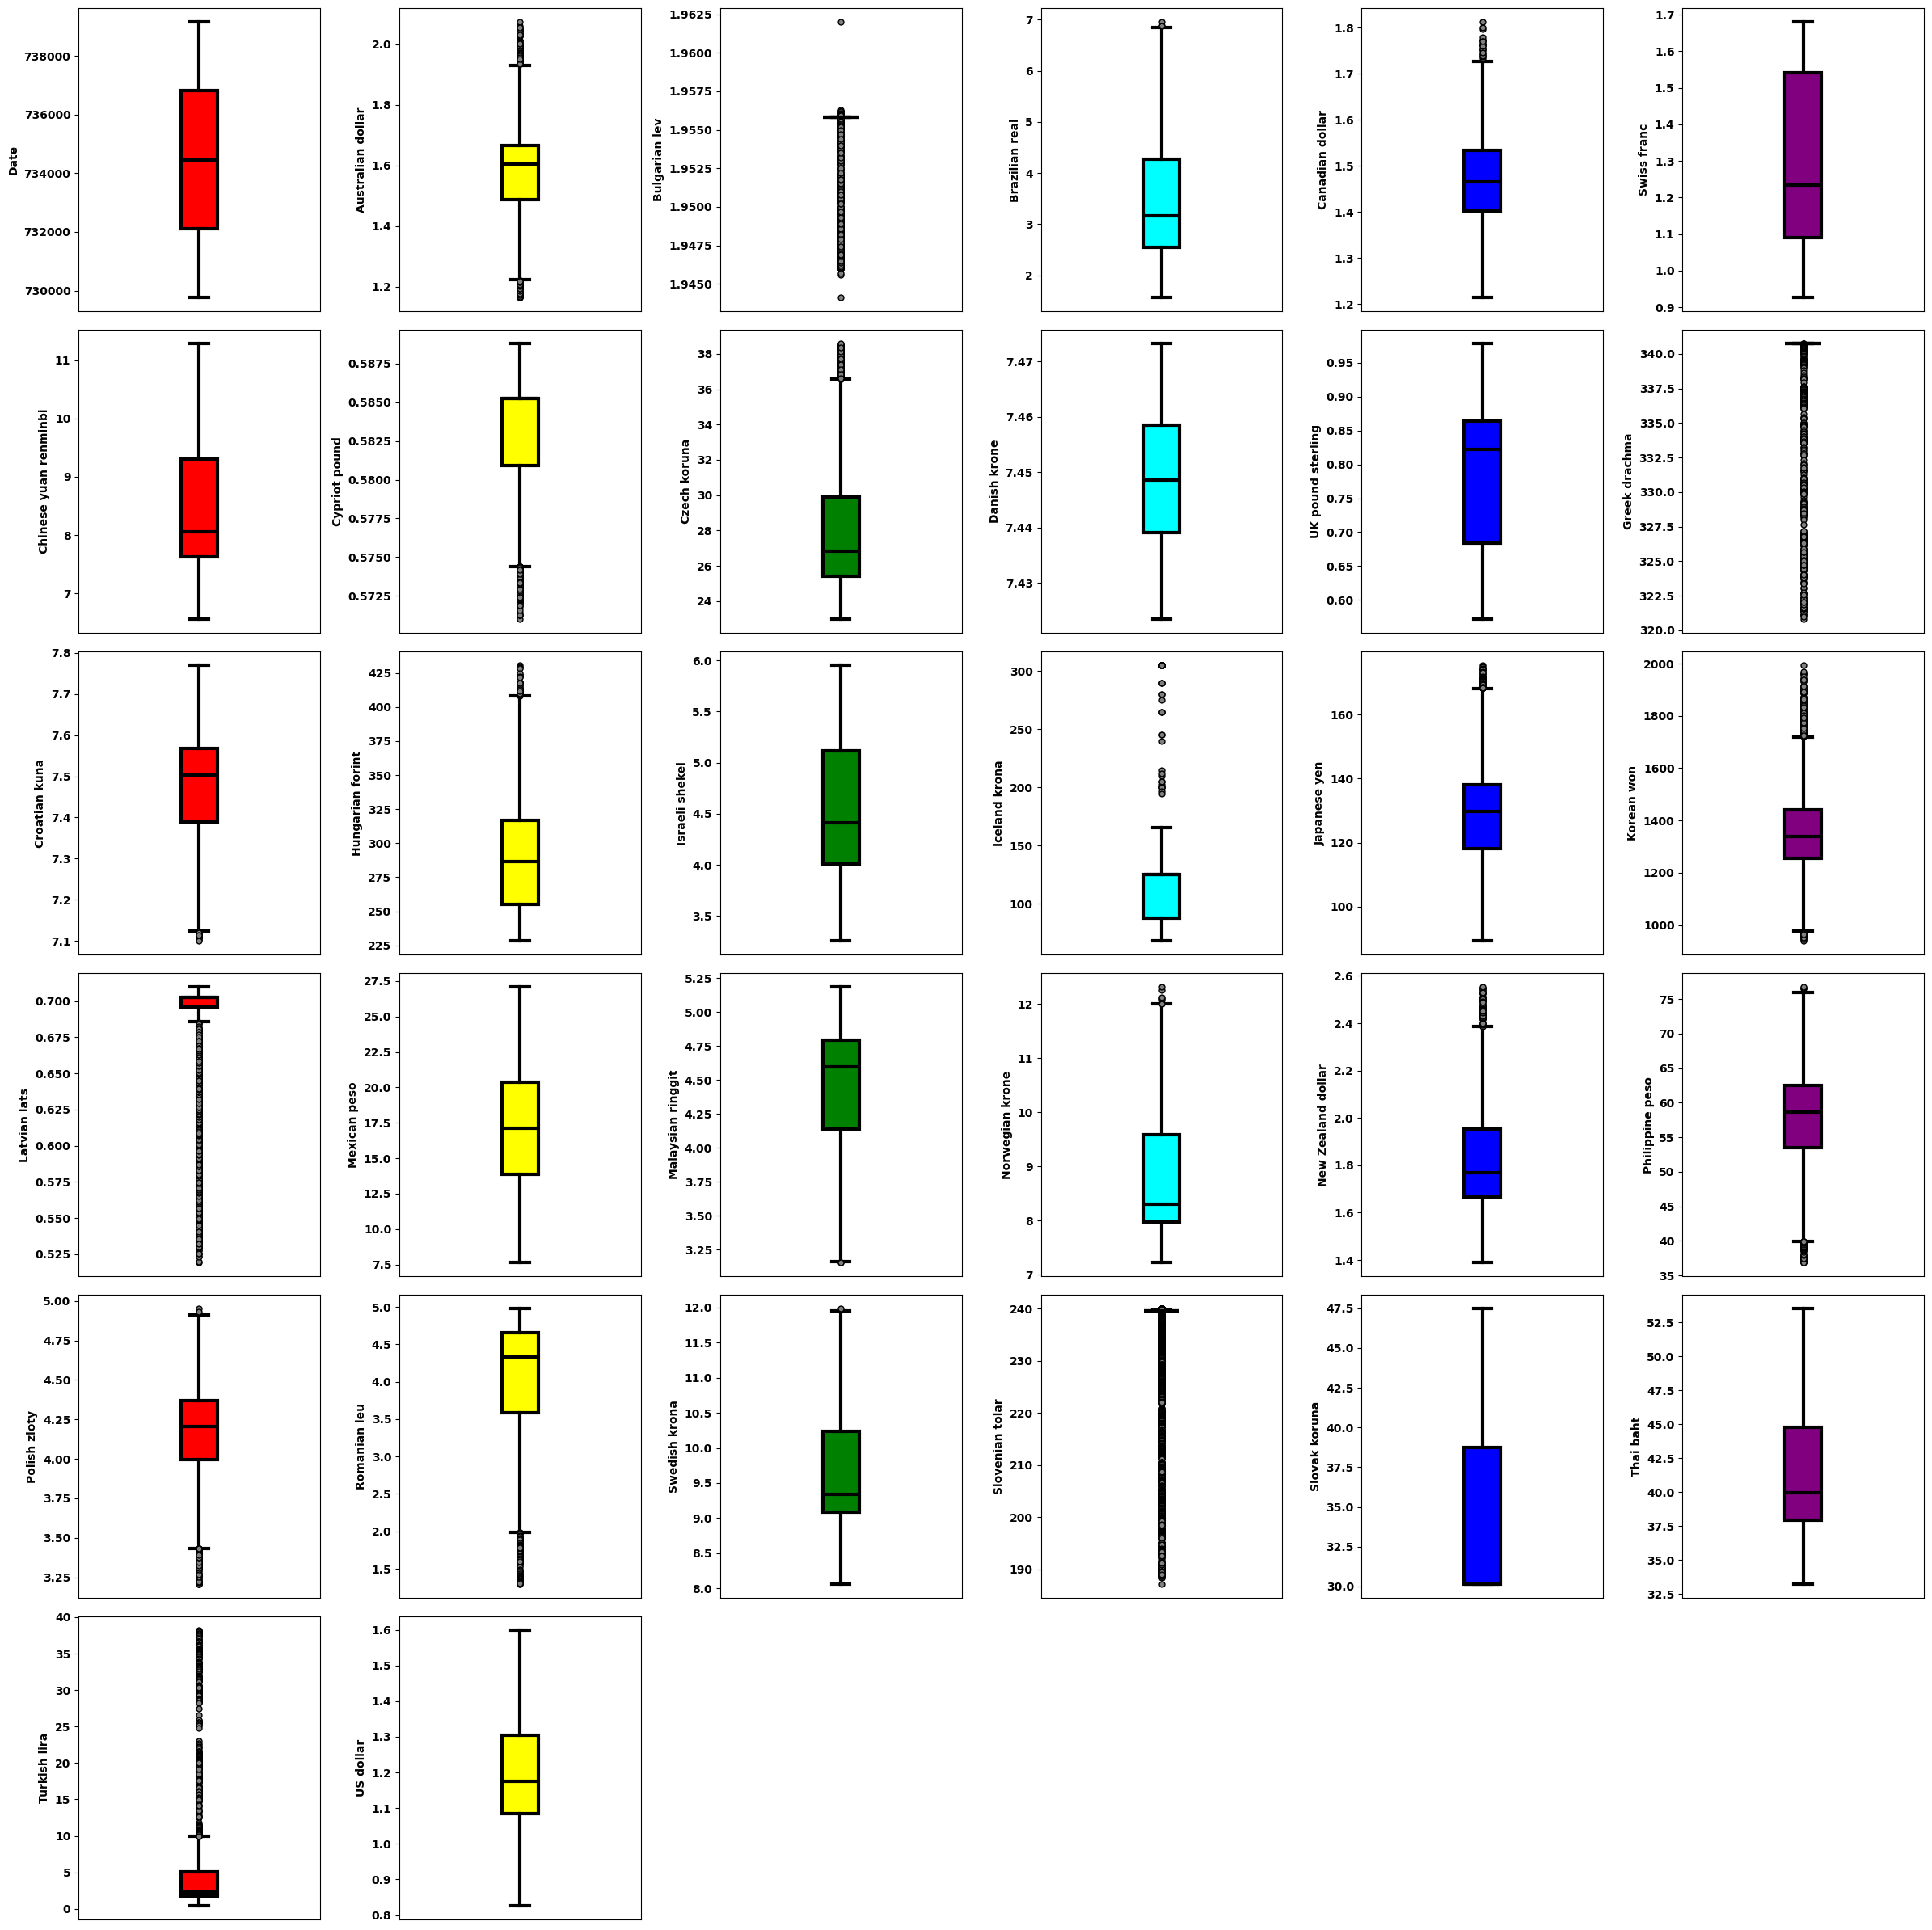

In [19]:
numeric_columns = dataset.select_dtypes(include='number').columns.drop('Global inflation')

number_columns = 6
number_rows = math.ceil(len(numeric_columns) / number_columns)

fig, axes = plt.subplots(nrows=number_rows, ncols=number_columns, figsize=(4 * number_columns, 4 * number_rows))
axes = axes.flatten()

outliers = dict(marker='o', markerfacecolor='gray', markeredgecolor='black', markersize=5)
median_line = dict(color='black', linewidth=3)
whiskers_lines = dict(color='black', linewidth=3)
limits_lines = dict(color='black', linewidth=3)

boxplot_red = dict(facecolor='red', color='black', linewidth=3)
boxplot_yellow = dict(facecolor='yellow', color='black', linewidth=3)
boxplot_green = dict(facecolor='green', color='black', linewidth=3)
boxplot_azure = dict(facecolor='#00FFFF', color='black', linewidth=3)
boxplot_blue = dict(facecolor='blue', color='black', linewidth=3)
boxplot_purple = dict(facecolor='purple', color='black', linewidth=3)
colors = [boxplot_red, boxplot_yellow, boxplot_green, boxplot_azure, boxplot_blue, boxplot_purple]

for index, column in enumerate(numeric_columns):
    boxplot = colors[index % len(colors)]
    axes[index].boxplot(
        dataset[column].dropna(),
        patch_artist=True,
        boxprops=boxplot,
        medianprops=median_line,
        whiskerprops=whiskers_lines,
        capprops=limits_lines,
        flierprops=outliers
    )
    axes[index].set_xticks([])
    axes[index].set_ylabel(column, fontweight='bold')
    for tick in axes[index].get_yticklabels():
        tick.set_fontweight('bold')

for index in range(len(numeric_columns), len(axes)):
    axes[index].set_visible(False)

plt.tight_layout()
plt.show()

In [20]:
features = dataset.drop(columns=['Global inflation'])
targets = dataset['Global inflation']

scaler = StandardScaler()
features_scaled_df = pd.DataFrame(scaler.fit_transform(features), columns=features.columns, index=features.index)
scaled_dataset = pd.concat([features_scaled_df, targets], axis=1)
scaled_dataset

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Philippine peso,Polish zloty,Romanian leu,Swedish krona,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,Global inflation
0,1.730785,0.256060,0.474871,1.969489,0.398068,-1.610255,-0.555858,0.575838,-0.774213,0.761014,...,0.646338,0.291178,1.079551,2.040652,0.411033,-0.693435,-1.132946,4.277101,-0.447505,1
1,1.730417,0.281446,0.474871,1.946862,0.386476,-1.596222,-0.557375,0.575838,-0.773931,0.778841,...,0.624406,0.282019,1.078984,2.073859,0.411033,-0.693435,-1.115838,4.272999,-0.449432,1
2,1.730049,0.321927,0.474871,2.002818,0.406498,-1.577365,-0.514636,0.575838,-0.784103,0.805581,...,0.648688,0.260105,1.079097,2.087387,0.411033,-0.693435,-1.033716,4.286952,-0.424376,1
3,1.729680,0.295168,0.474871,2.023152,0.394906,-1.601923,-0.550504,0.575838,-0.775061,0.769927,...,0.647644,0.267300,1.078644,2.065865,0.411033,-0.693435,-1.040132,4.260482,-0.463567,1
4,1.729312,0.320554,0.474871,2.069477,0.428629,-1.597977,-0.537299,0.575838,-0.791167,0.859061,...,0.608348,0.295103,1.077058,2.150110,0.411033,-0.693435,-1.021954,4.256315,-0.472561,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,-1.729059,1.783353,-2.183763,-1.237296,3.145432,1.335814,0.053018,-0.234284,1.989340,-0.460114,...,-1.742220,-0.485649,-3.070018,-0.551896,-4.065103,1.672269,0.240880,-0.656509,-0.125629,-1
6651,-1.729428,1.830009,-2.183763,-1.237296,3.102224,1.347654,0.053018,-0.234284,1.974647,-0.477941,...,-1.723812,-0.550412,-3.075797,-0.533448,-4.068627,1.711272,0.157219,-0.656731,-0.142976,-1
6652,-1.729796,2.067405,-2.183763,-1.237296,3.217093,1.326166,0.053018,-0.203308,1.964474,-0.290760,...,-1.666892,-0.583120,-3.067186,-0.379715,-4.077438,1.713746,0.269944,-0.656456,-0.071662,-1
6653,-1.730164,2.152484,-2.183763,-1.237296,3.484768,1.329236,0.053018,-0.131827,1.983406,0.092513,...,-1.683472,-0.524245,-3.067186,-0.259804,-4.070830,1.727064,0.229289,-0.656378,-0.041466,-1


In [21]:
x = scaled_dataset.drop(columns=['Global inflation'])
y = scaled_dataset['Global inflation']

x_train, x_temporary, y_train, y_temporary = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True)
x_validation, x_test, y_validation, y_test = train_test_split(x_temporary, y_temporary, test_size=0.5, random_state=42, shuffle=True)

train_df = pd.concat([x_train, y_train], axis=1)
validation_df = pd.concat([x_validation, y_validation], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)

print("Train set size:     ", train_df.shape[0])
print("Validation set size:", validation_df.shape[0])
print("Test set size:      ", test_df.shape[0])

Train set size:      4615
Validation set size: 989
Test set size:       989


In [22]:
train_df

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Philippine peso,Polish zloty,Romanian leu,Swedish krona,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,Global inflation
4196,-0.463568,0.248512,0.474871,-0.753412,1.126272,1.339761,2.010271,0.575838,-0.940365,0.930367,...,1.341391,-2.642120,-0.454116,-0.371352,0.411033,-0.655573,1.979336,-0.458155,2.279123,1
252,1.598196,0.552462,0.474871,1.411608,-0.309060,-1.505007,-0.715661,0.575838,-0.961841,0.885801,...,0.236670,1.433358,1.078304,2.488937,0.411033,-0.693435,-0.563441,3.056248,-0.890164,1
1423,0.984602,0.081786,0.474871,0.622334,0.477106,-0.755553,-0.786685,0.575838,-0.630384,1.046241,...,0.260169,0.374911,0.833552,1.177905,0.411033,-0.693435,-1.226616,0.098888,-0.372336,-1
3797,-0.257686,0.255373,0.474871,-0.717178,0.815389,0.892018,1.334476,0.575838,-0.437387,-0.620554,...,1.266846,0.032453,0.243201,0.992564,0.411033,-0.693435,1.472277,-0.418110,1.738166,1
350,1.547370,0.328102,0.474871,1.430107,-0.095130,-1.472117,-0.756348,0.575838,-1.191007,-0.067927,...,0.350379,1.171690,1.073205,2.148757,0.411033,-0.693435,-0.923151,2.090372,-0.669156,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3780,-0.249215,-0.135026,0.474871,-0.762279,0.129338,0.755634,1.158969,0.575838,-0.448408,-0.665121,...,1.011228,-0.248513,0.160710,0.752372,0.411033,-0.693435,1.260985,-0.430326,1.553778,1
5225,-0.994293,1.078712,0.474871,0.211911,1.780707,0.900788,1.426736,-0.322444,1.063635,-1.467322,...,1.360451,1.253135,0.059977,-0.571819,0.411033,1.163892,1.741461,-0.468162,0.182112,1
5260,-1.012340,0.669101,-2.392869,0.096635,2.055760,1.052521,1.379446,0.868911,1.217919,-0.575987,...,1.253530,1.847121,0.010346,-0.628393,0.327326,1.217545,1.474266,-0.470723,0.140352,1
5429,-1.098892,0.821419,-2.333125,-0.159144,0.817497,1.088481,0.795286,0.154098,1.359487,-1.921902,...,0.570749,0.874043,-0.242111,-0.580182,0.018930,1.461840,0.957648,-0.502576,-0.368482,-1


In [23]:
validation_df

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Philippine peso,Polish zloty,Romanian leu,Swedish krona,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,Global inflation
2868,0.224423,-1.052363,0.474871,-0.400169,-1.056233,-0.329737,-0.344839,0.575838,-0.545330,0.787754,...,-0.089577,0.249311,0.478208,-1.210487,0.411033,-0.693435,-0.126742,-0.374551,0.823294,1
1188,1.108720,0.252629,0.474871,0.946528,-0.200514,-1.073052,-0.748317,0.575838,-0.853333,2.080189,...,-0.319999,0.230994,0.841484,1.085665,0.411033,-0.693435,-1.600655,0.156205,-0.604267,-1
5218,-0.990242,0.934628,0.474871,0.188290,1.682700,0.919207,1.555221,-0.250963,1.093022,-1.012741,...,1.462281,1.099732,0.068702,-0.522994,0.434823,1.150003,1.878523,-0.473258,0.291974,1
1375,1.010752,0.284190,0.474871,0.784240,0.309545,-0.806862,-0.655969,0.575838,-0.594780,1.741482,...,0.126615,0.389303,0.837178,1.409733,0.411033,-0.693435,-1.228969,0.184778,-0.439153,1
2663,0.333073,-0.651672,0.474871,-0.305914,0.544552,-0.400780,0.216925,0.575838,-0.139839,1.367121,...,0.479886,0.027547,0.468690,-0.700832,0.411033,-0.693435,0.832627,-0.326524,1.348189,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966,0.172493,-2.088398,0.474871,-0.686601,-1.307047,-0.405603,-0.265785,0.575838,-0.660337,0.930367,...,-0.557079,-0.055532,0.401497,-1.419686,0.411033,-0.693435,-0.518317,-0.396265,0.785388,1
1832,0.768776,-0.592666,0.474871,0.161535,0.308491,-0.697667,-0.422376,0.575838,-0.546178,-0.923608,...,0.259124,0.221836,0.613955,-0.005468,0.411033,-0.693435,-0.428497,-0.156456,0.003507,1
4937,-0.845499,0.133245,0.474871,-0.476076,0.256853,1.093305,1.364991,-2.204785,0.549919,1.117548,...,1.485258,-0.352526,-0.649465,-0.287106,0.399578,0.970206,2.003929,-0.493130,0.291331,-1
2653,0.338229,-0.691466,0.474871,-0.355144,0.270553,-0.384554,0.068186,0.575838,-0.128536,1.456255,...,0.252597,-0.027076,0.435716,-0.761710,0.411033,-0.693435,0.660471,-0.330156,1.165086,1


In [24]:
test_df

,Date,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Philippine peso,Polish zloty,Romanian leu,Swedish krona,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,Global inflation
3443,-0.075008,-1.520294,0.474871,-0.918987,-0.768534,-0.114856,0.977752,0.575838,-1.073174,0.725361,...,0.729891,-0.820257,0.055331,-0.846202,0.411033,-0.693435,0.510984,-0.413877,1.774786,1
3448,-0.077586,-1.499025,0.474871,-0.936952,-1.016187,-0.109593,0.797606,0.575838,-1.066110,0.814494,...,0.565658,-0.674704,0.073461,-0.851982,0.411033,-0.693435,0.333481,-0.418489,1.572410,1
315,1.565417,0.343882,0.474871,1.377667,-0.178383,-1.462470,-0.503215,0.575838,-1.146925,0.074687,...,0.378970,0.950254,1.050090,2.817310,0.411033,-0.693435,-0.698172,2.999428,-0.613904,1
2273,0.537113,-0.500726,0.474871,0.454312,-0.354375,-1.011218,-1.414476,0.575838,-0.244673,1.081894,...,-0.903170,0.190108,0.477642,-0.338146,0.411033,-0.693435,-0.596589,-0.300590,-0.700637,-1
4377,-0.556749,0.237534,0.474871,-0.668331,-0.474513,1.506403,1.936571,0.320888,-0.086998,0.671881,...,0.813965,-1.336070,-0.729236,-0.497167,0.411033,0.059427,0.760770,-0.480208,1.459978,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,0.748151,-0.626285,0.474871,0.148922,0.544552,-0.980521,-0.725208,0.575838,-0.460558,-0.905781,...,-0.263209,0.071049,0.615088,0.214923,0.411033,-0.693435,-0.687051,-0.184245,-0.401890,-1
6302,-1.549327,-0.133654,-2.183763,-1.407076,-1.122625,1.101637,-0.810240,-2.364427,2.629083,0.493614,...,-2.612472,-0.479435,-2.471169,-1.731948,-2.665614,1.767589,-1.344089,-0.632181,-1.765204,-1
584,1.425093,-0.511704,0.474871,1.468711,-1.049910,-1.284863,-1.259313,0.575838,-0.895719,-0.870128,...,-0.100282,1.528213,1.044311,1.259075,0.411033,-0.693435,-0.914383,1.675883,-0.859326,1
2627,0.351488,-0.924060,0.474871,-0.382128,-0.107776,-0.407796,0.020451,0.575838,-0.124015,0.769927,...,0.263694,-0.106558,0.413054,-0.513524,0.411033,-0.693435,0.596313,-0.326929,1.134247,1


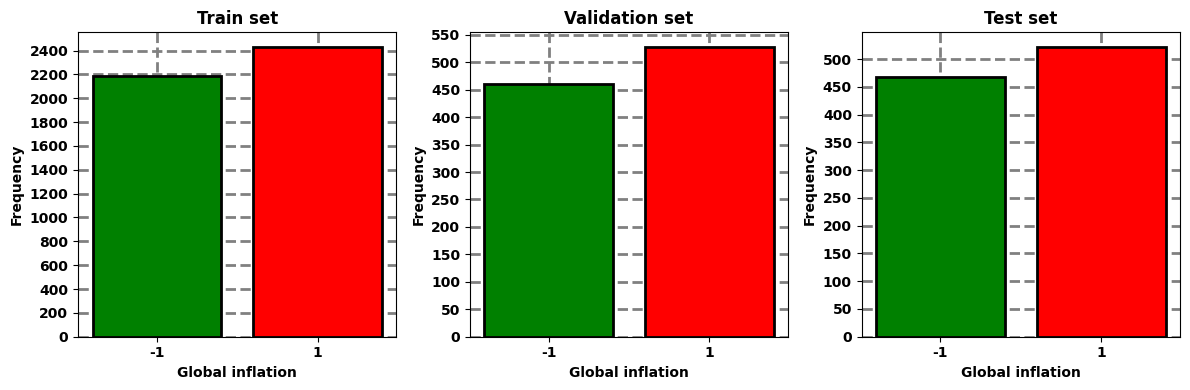

In [25]:
datasets = {
    'Train': train_df,
    'Validation': validation_df,
    'Test': test_df
}

colors = {-1: 'green', 1: 'red'}

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for axe, (label, df) in zip(axes, datasets.items()):
    axe.set_axisbelow(True)
    axe.grid(True, color='grey', linestyle='--', linewidth=2, zorder=0)

    counts = df['Global inflation'].value_counts().sort_index()
    axe.bar(counts.index.astype(str),
            counts.values,
            color=[colors[value] for value in counts.index],
            edgecolor='black',
            linewidth=2,
            zorder=3)

    axe.set_title(f'{label} set', fontsize=12, fontweight='bold')
    axe.set_xlabel('Global inflation', fontsize=10, fontweight='bold')
    axe.set_ylabel('Frequency', fontsize=10, fontweight='bold')

    axe.tick_params(axis='both', labelsize=10)
    axe.locator_params(axis='y', nbins=20)
    for label in axe.get_xticklabels():
        label.set_fontweight('bold')
    for label in axe.get_yticklabels():
        label.set_fontweight('bold')

plt.tight_layout()
plt.show()

In [26]:
def evaluate_model_metrics(model, model_name, x, y, dataset_name):
    y_predicted = model.predict(x)
    print(f"Model:        {model_name}\n")
    print(f"Dataset:      {dataset_name}\n")
    print(f"Accuracy:     {accuracy_score(y, y_predicted):.4f}")
    print(f"Precision:    {precision_score(y, y_predicted, average='weighted', zero_division=0):.4f}")
    print(f"Recall:       {recall_score(y, y_predicted, average='weighted', zero_division=0):.4f}")
    print(f"F1-score:     {f1_score(y, y_predicted, average='weighted', zero_division=0):.4f}\n\n")

In [28]:
decision_tree_model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=12,
    min_samples_split=8,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)

decision_tree_model.fit(x_train, y_train)

evaluate_model_metrics(decision_tree_model, "Decision Tree", x_train, y_train, "Train")
evaluate_model_metrics(decision_tree_model, "Decision Tree", x_validation, y_validation, "Validation")
evaluate_model_metrics(decision_tree_model, "Decision Tree", x_test, y_test, "Test")

Model:        Decision Tree

Dataset:      Train

Accuracy:     0.9924
Precision:    0.9924
Recall:       0.9924
F1-score:     0.9924


Model:        Decision Tree

Dataset:      Validation

Accuracy:     0.9798
Precision:    0.9798
Recall:       0.9798
F1-score:     0.9798


Model:        Decision Tree

Dataset:      Test

Accuracy:     0.9889
Precision:    0.9889
Recall:       0.9889
F1-score:     0.9889




In [27]:
knn_model = KNeighborsClassifier(
    n_neighbors=3,
    weights='distance',
    algorithm='auto',
    p=2
)

knn_model.fit(x_train, y_train)

evaluate_model_metrics(knn_model, "K-Nearest Neighbors", x_train, y_train, "Train")
evaluate_model_metrics(knn_model, "K-Nearest Neighbors", x_validation, y_validation, "Validation")
evaluate_model_metrics(knn_model, "K-Nearest Neighbors", x_test, y_test, "Test")

Model:        K-Nearest Neighbors

Dataset:      Train

Accuracy:     1.0000
Precision:    1.0000
Recall:       1.0000
F1-score:     1.0000


Model:        K-Nearest Neighbors

Dataset:      Validation

Accuracy:     0.9848
Precision:    0.9848
Recall:       0.9848
F1-score:     0.9848


Model:        K-Nearest Neighbors

Dataset:      Test

Accuracy:     0.9869
Precision:    0.9869
Recall:       0.9869
F1-score:     0.9869




In [29]:
gaussian_naive_bayes_model = GaussianNB(
    var_smoothing=1e-1
)
gaussian_naive_bayes_model.fit(x_train, y_train)

evaluate_model_metrics(gaussian_naive_bayes_model, "Gaussian Naive Bayes", x_train, y_train, "Train")
evaluate_model_metrics(gaussian_naive_bayes_model, "Gaussian Naive Bayes", x_validation, y_validation, "Validation")
evaluate_model_metrics(gaussian_naive_bayes_model, "Gaussian Naive Bayes", x_test, y_test, "Test")

Model:        Gaussian Naive Bayes

Dataset:      Train

Accuracy:     0.7918
Precision:    0.8089
Recall:       0.7918
F1-score:     0.7869


Model:        Gaussian Naive Bayes

Dataset:      Validation

Accuracy:     0.7887
Precision:    0.8065
Recall:       0.7887
F1-score:     0.7830


Model:        Gaussian Naive Bayes

Dataset:      Test

Accuracy:     0.7947
Precision:    0.8151
Recall:       0.7947
F1-score:     0.7893




**One Rule classifier** is applied exclusively to categorical features (in our case, except for the target values, which are categorical ordinal, all other features are quantitative continuous).

**Top best classifiers:**
1. **Decision Tree:**
* Accuracy:     0.9889
* Precision:    0.9889
* Recall:       0.9889
* F1-score:     0.9889
2. **K-Nearest Neighbors:**
* Accuracy:     0.9869
* Precision:    0.9869
* Recall:       0.9869
* F1-score:     0.9869
3. **Gaussian Naive Bayes:**
* Accuracy:     0.7947
* Precision:    0.8151
* Recall:       0.7947
* F1-score:     0.7893
4. **One Rule:**
* Not tested




